In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

from sklearn.cluster import KMeans, k_means
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

import config
# Folder
folder = './training/Final/'

file =  folder + 'dataset.csv'

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
frame = pd.read_csv(file, sep='|')
frame.head()

,content,industries,location,title,type_empl,url,wage,suburb,experiences,title_left_over
0,Public Safety Business Agency / Kedron Tempora...,Information & Communication Technology,Brisbane,DA,Permanent,https://www.seek.com.au/job/39018343?type=stan...,85572.0,Northern Suburbs,General,Data Analyst
1,Fantastic working culture Flexible work enviro...,Information & Communication Technology,Brisbane,SDA,Contract,https://www.seek.com.au/job/39007973?type=stan...,99961.0,CBD & Inner Suburbs,Senior,Senior Business Analyst
2,CBD Location 12 month contract Join this State...,Information & Communication Technology,Brisbane,DA,Contract,https://www.seek.com.au/job/38912693?type=stan...,174590.0,CBD & Inner Suburbs,General,Database Analyst
3,CBD Location Initial 3 month contract Join thi...,Information & Communication Technology,Brisbane,DA,Contract,https://www.seek.com.au/job/39037731?type=stan...,177450.0,CBD & Inner Suburbs,General,Data Analyst
4,CBD Location! Initial contract through till en...,Information & Communication Technology,Brisbane,SDA,Contract,https://www.seek.com.au/job/39003265?type=stan...,173550.0,CBD & Inner Suburbs,Senior,Senior Test Analyst


In [3]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 10 columns):
content            1569 non-null object
industries         1569 non-null object
location           1569 non-null object
title              1569 non-null object
type_empl          1569 non-null object
url                1569 non-null object
wage               1569 non-null float64
suburb             1569 non-null object
experiences        1569 non-null object
title_left_over    1569 non-null object
dtypes: float64(1), object(9)
memory usage: 122.7+ KB


In [4]:
frame.drop(columns=['content','experiences','title_left_over','url','suburb'] ,axis=1, inplace=True)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 5 columns):
industries    1569 non-null object
location      1569 non-null object
title         1569 non-null object
type_empl     1569 non-null object
wage          1569 non-null float64
dtypes: float64(1), object(4)
memory usage: 61.4+ KB


In [73]:
frame = frame[frame['wage']>50000]

In [75]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 0 to 1568
Data columns (total 5 columns):
industries    1505 non-null object
location      1505 non-null object
title         1505 non-null object
type_empl     1505 non-null object
wage          1505 non-null float64
dtypes: float64(1), object(4)
memory usage: 70.5+ KB


In [76]:
# frame = frame[frame['wage'] > 10000]
# frame.info()

Text(0.5, 0.98, 'Distributions of content over the year')

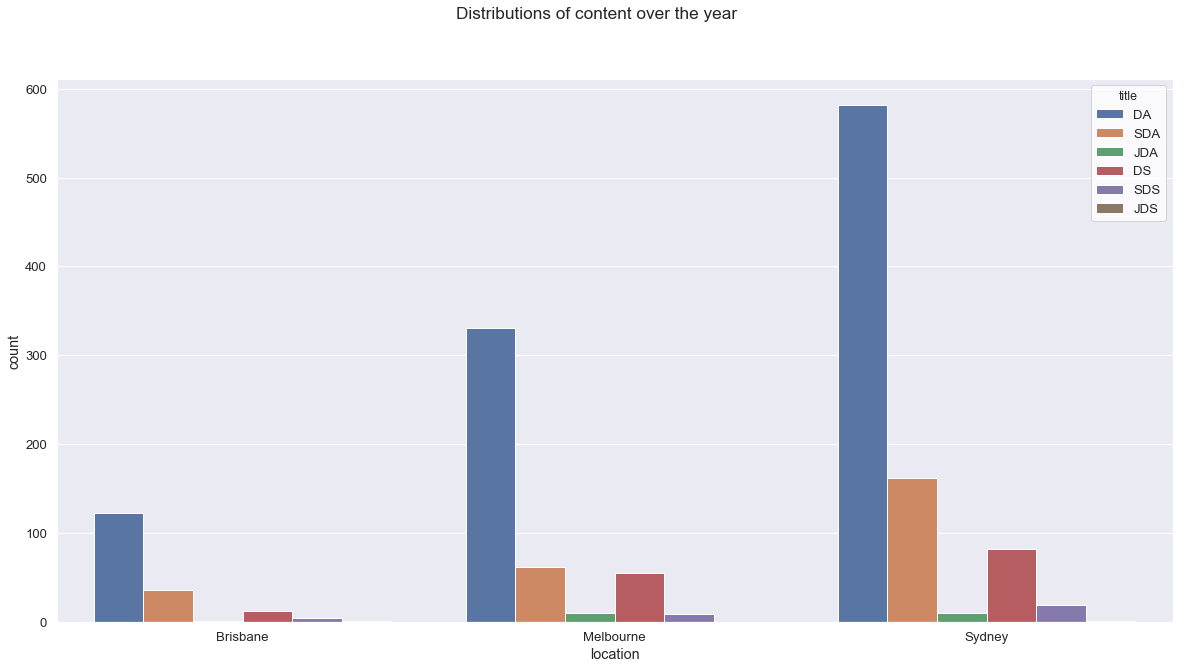

In [77]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.set(style="whitegrid", color_codes=True, font_scale=1.2)
# sns.countplot(x='year', data=df_datetime, orient='h')
sns.countplot(x='location',hue='title', data=frame, orient='h')
fig.suptitle('Distributions of content over the year')
# sns.barplot(x='title',y='wage',data=frame)

Text(0.5, 0.98, 'Length of text for each title')

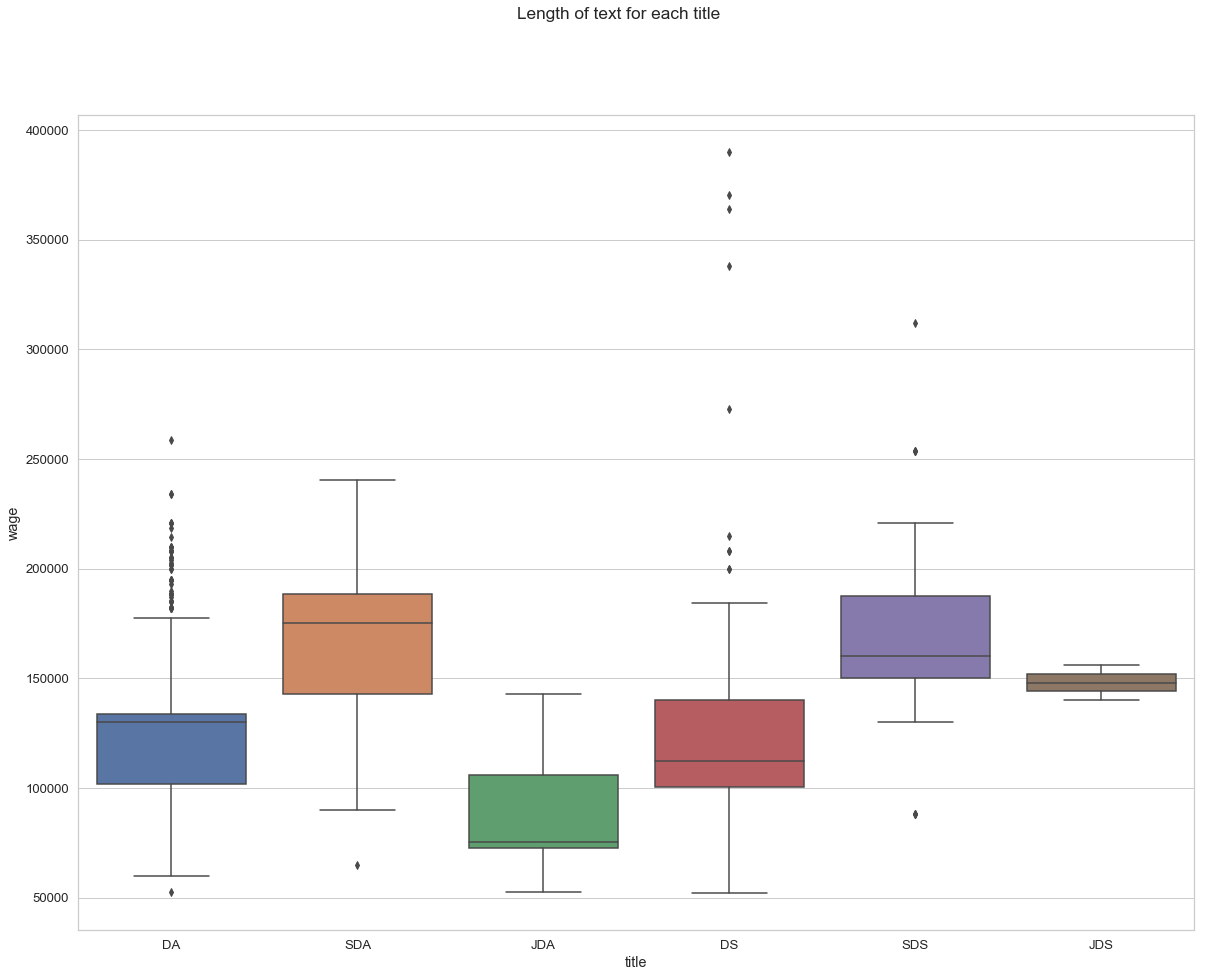

In [78]:
fig, ax = plt.subplots(1,1, figsize=(20,15))
sns.boxplot(x='title' , y='wage', data=frame)
fig.suptitle('Length of text for each title')

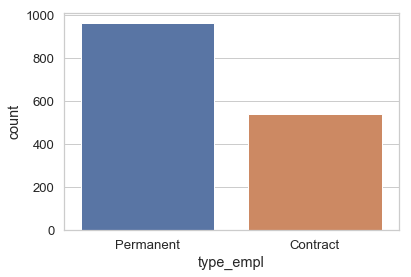

In [79]:
sns.countplot(x='type_empl',data=frame)

In [80]:
frame['type_empl'].value_counts(normalize=True).max()*100

63.98671096345515

In [81]:
y = frame['wage'].values
df_dummies = frame.copy()
df_dummies.drop(labels=['wage'],axis=1,inplace=True)
X = pd.get_dummies(df_dummies, prefix=df_dummies.columns, columns=df_dummies.columns)


In [82]:
y_temp = pd.DataFrame(y,columns=['wage'])
df_temp = pd.concat([X,y_temp])
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3010 entries, 0 to 1504
Data columns (total 22 columns):
industries_Accounting                                1505 non-null float64
industries_Banking & Financial Services              1505 non-null float64
industries_Consulting & Strategy                     1505 non-null float64
industries_Government & Defence                      1505 non-null float64
industries_Information & Communication Technology    1505 non-null float64
industries_Insurance & Superannuation                1505 non-null float64
industries_Manufacturing, Transport & Logistics      1505 non-null float64
industries_Marketing & Communications                1505 non-null float64
industries_Sales                                     1505 non-null float64
industries_Science & Technology                      1505 non-null float64
location_Brisbane                                    1505 non-null float64
location_Melbourne                                   1505 non-null f

C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


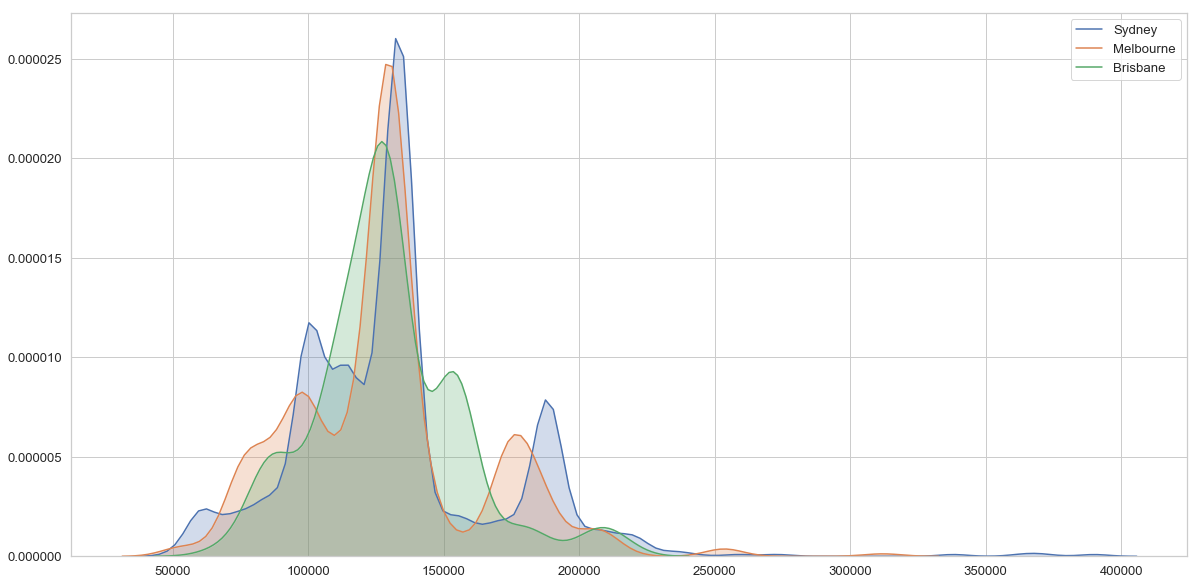

In [83]:
fig, ax = plt.subplots(figsize=(20,10))
# Salary Distribution Within location
for city in config.LOCATIONS:
    sns.kdeplot(frame[frame['location'] == city]['wage'], cbar=True, 
                shade=True, ax=ax, bw='scott',label=city)

([0], <a list of 1 Text xticklabel objects>)

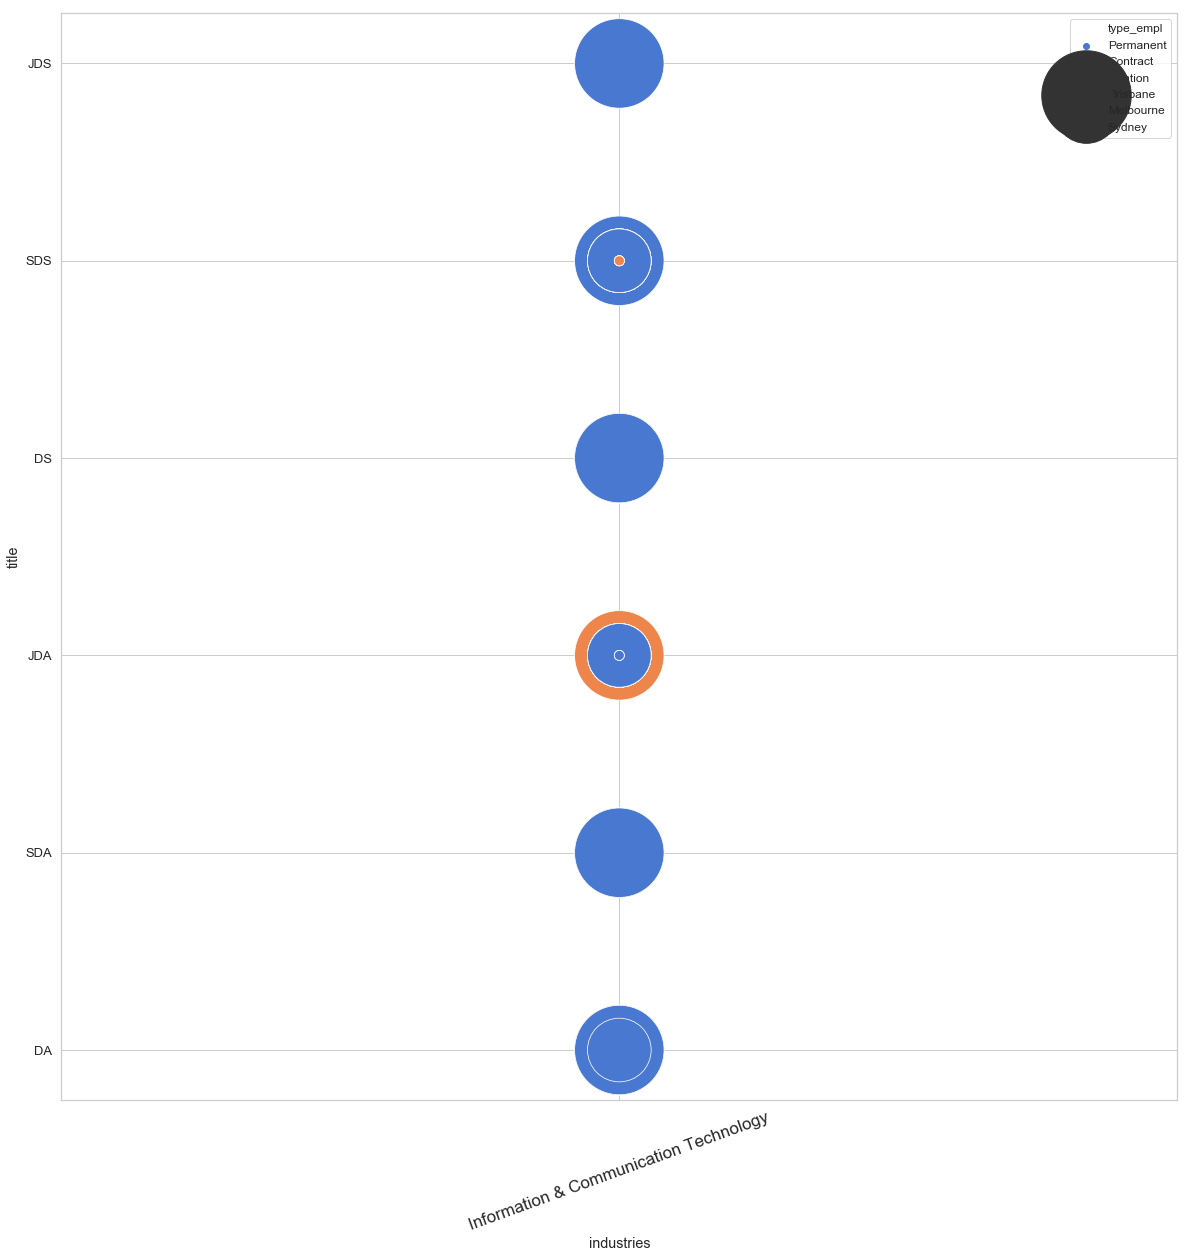

In [84]:
plt.figure(figsize=(20,20))
df_Sydney = frame[frame['industries'] == 'Information & Communication Technology']
sns.scatterplot(y='title',x='industries',data=df_Sydney,sizes=(100, 8000),
                alpha=1, palette='muted', legend='brief',hue='type_empl',size='location')
plt.legend(fontsize=12)
plt.yticks(fontsize=13)
plt.xticks(rotation=20, fontsize=17)

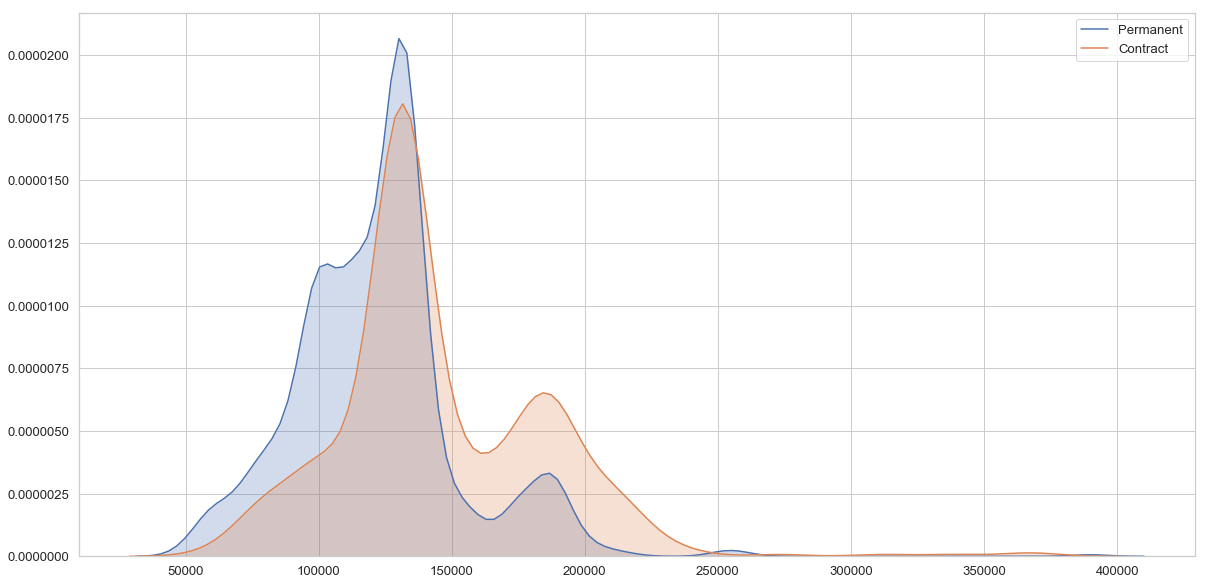

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
# Salary Distribution Within location
for jd in frame['type_empl'].unique():
    sns.kdeplot(frame[frame['type_empl'] == jd]['wage'], cbar=True, shade=True, ax=ax, bw='scott',label=jd)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

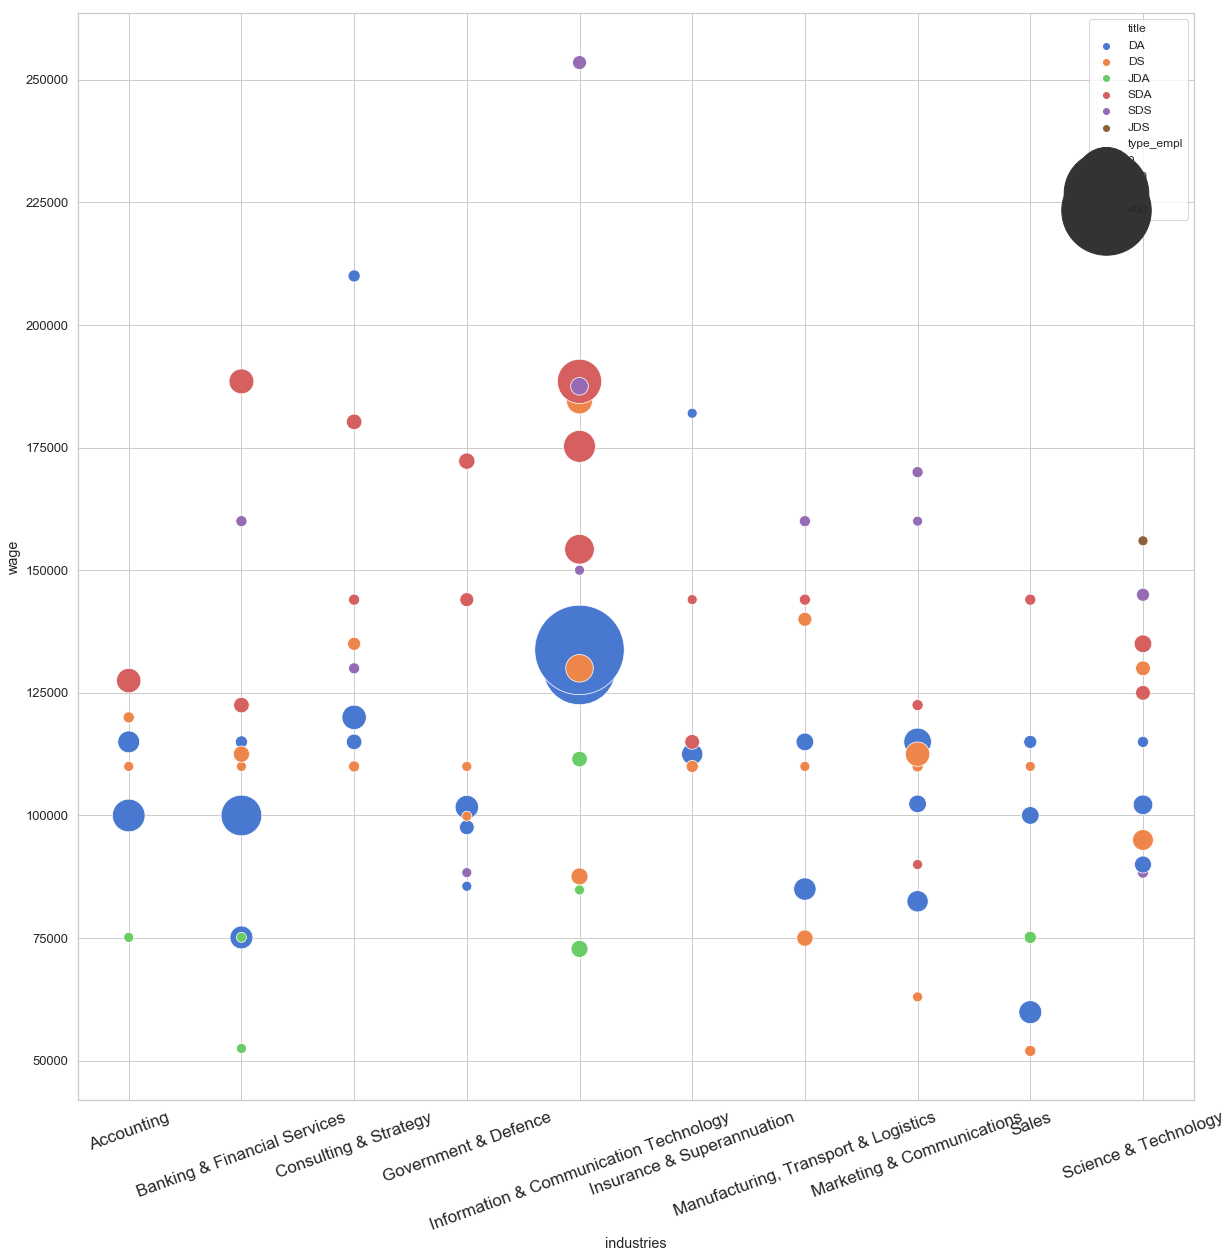

In [86]:
grouped_frame = pd.DataFrame(frame.groupby(['industries','location','title'])['wage'].median())
grouped_frame = pd.concat([grouped_frame, pd.DataFrame(frame.groupby(['industries','location','title'])['type_empl'].count())],axis=1)
grouped_frame.reset_index(inplace=True)
plt.figure(figsize=(20,20))
sns.scatterplot(y='wage',x='industries',data=grouped_frame,sizes=(100, 8000),
                alpha=1, palette='muted', legend='brief',hue='title',size='type_empl')
plt.legend(fontsize=12)
# plt.ylabel('')
plt.yticks(fontsize=13)
plt.xticks(rotation=20, fontsize=17)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1053, 21), (1053,), (452, 21), (452,))

## 1. Linear

In [88]:
lm = LinearRegression()
lm_model = lm.fit(X_train,y_train)
m = lm_model.coef_[0]
b = lm_model.intercept_

print("formula: y = {}x + {}".format(m,b))

formula: y = -2918.8649195305265x + 123245.2253804475


In [89]:
y_pred = lm_model.predict(X_test)
print("Our score: ", lm_model.score(X_test, y_test))
print("Variance score: ", r2_score(y_test, y_pred))
print("Mean square error: ",mean_squared_error(y_test, y_pred))

Our score:  0.5069285458295829
Variance score:  0.5069285458295829
Mean square error:  624355240.3907177


In [90]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  """


In [91]:
lm2 = LinearRegression()
lm2_model = lm.fit(X_train,y_train)
m = lm2_model.coef_[0]
b = lm2_model.intercept_

print("formula: y = {}x + {}".format(m,b))
y_pred = lm2_model.predict(X_test)
print("Our score: ", lm2_model.score(X_test, y_test))
print("Variance score: ", r2_score(y_test, y_pred))
print("Mean square error: ",mean_squared_error(y_test, y_pred))

formula: y = -4.468200329851374e+16x + 130465.55816664056
Our score:  0.49105619592398125
Variance score:  0.4910561959239812
Mean square error:  644453716.4981024


In [92]:
y_test.shape, y_pred.shape

((452,), (452,))

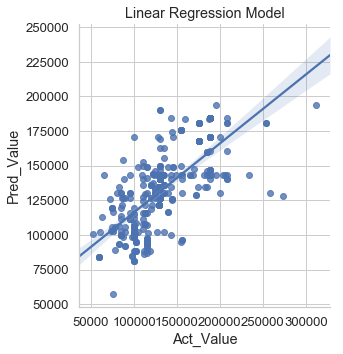

In [93]:
columns=['Act_Value','Pred_Value']
helper = pd.DataFrame([np.array(y_test),y_pred])
helper = helper.transpose()
helper.columns = columns

sns.lmplot(x='Act_Value', y='Pred_Value', data = helper);
ax = plt.gca()
ax.set_title("Linear Regression Model");


In [94]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [66]:
logreg.score(X_test, y_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
columns=['Act_Value','Pred_Value']
helper = pd.DataFrame([np.array(y_test),y_pred])
helper = helper.transpose()
helper.columns = columns

sns.lmplot(x='Act_Value', y='Pred_Value', data = helper);
ax = plt.gca()
ax.set_title("Logistic Regression Model");

## 2. Classification

In [26]:
### KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Baseline
print("Baseline: ",frame['title'].value_counts(normalize=True)*100)

knn6 = KNeighborsClassifier(n_neighbors=6, weights='uniform')

Baseline:  DA     67.877629
SDA    17.080943
DS     11.217336
SDS     2.103250
JDA     1.593372
JDS     0.127470
Name: title, dtype: float64


C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
skf = StratifiedKFold(n_splits=5)
cv_indices = skf.split(X, y)
cv_indices = [[tr,te] for tr,te in cv_indices]

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [ ]:
# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X, y, knn, cv_indices):
    
    # list to store the scores/accuracy of folds
    scores = []
    
    # iterate through the training and testing folds in cv_indices
    for train_i, test_i in cv_indices:
        print(train_i)
        print(len(X))
        # get the current X train & test subsets of X
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        # get the Y train & test subsets of Y
        Y_train = y[train_i]
        Y_test = y[test_i]

        # fit the knn model on the training data
        knn.fit(X_train, Y_train)
        
        # get the accuracy predicting the testing data
        acc = knn.score(X_test, Y_test)
        scores.append(acc)
        
        print(('Fold accuracy:', acc))
        
    print(('Mean CV accuracy:', np.mean(scores)))
    return scores


In [ ]:
scores = accuracy_crossvalidator(Xs, y, knn6, cv_indices)

## 3. PCA & Clustering

C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


[[0.00000000e+00 9.00000000e+00 0.00000000e+00 2.00000000e+00]
 [1.00000000e+00 4.00000000e+00 0.00000000e+00 2.00000000e+00]
 [2.00000000e+00 3.00000000e+00 0.00000000e+00 2.00000000e+00]
 ...
 [3.12900000e+03 3.13300000e+03 2.38150821e+01 6.58000000e+02]
 [3.13100000e+03 3.13200000e+03 2.76072005e+01 9.11000000e+02]
 [3.13400000e+03 3.13500000e+03 3.54852147e+01 1.56900000e+03]]


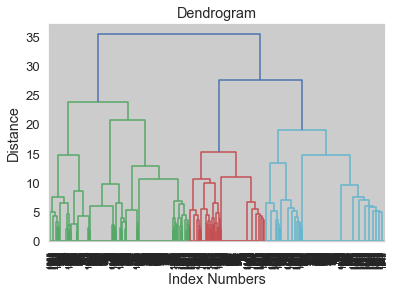

In [28]:
## Dendograme
def plot_dendogram(df):
    
    # Data prep
    X = df.as_matrix(columns=None)
    Z = linkage(X, 'ward')
    print(Z)
    
    # plotting
    plt.title('Dendrogram')
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    
    
plot_dendogram(X)

In [29]:
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # pairwise distance
    # plot_dendogram(lang)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print(("Clusters represented at distance: ", set(clusters)))
    
    # Complete color maps from matplotlib
    
    # plotting
    # Add legend with some customizations.
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))

#     ax[0].scatter(X[:,0], X[:,6], c=clusters, cmap=cm.jet, s=40)

#     ax[0].set_title("Max Dist: %d" % max_dist)
    
#     # plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
#     ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax.plot((0, 200), (max_dist, max_dist), 'r--')
    
    ax.set_title('Dendrogram')
    ax.set_xlabel('Index Numbers')
    ax.set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
        #link_color_func=lambda color: cmaps['Miscellaneous'],
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()

('Clusters represented at distance: ', {1, 2})
('Clusters represented at distance: ', {1, 2, 3, 4})
('Clusters represented at distance: ', {1, 2, 3, 4, 5, 6})


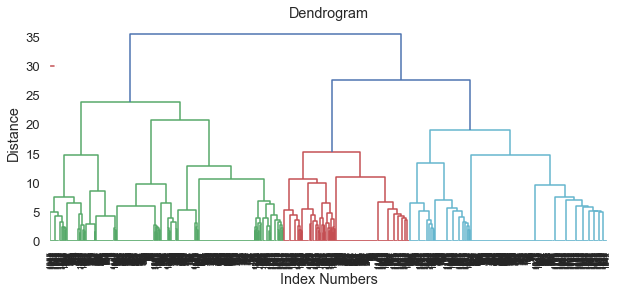

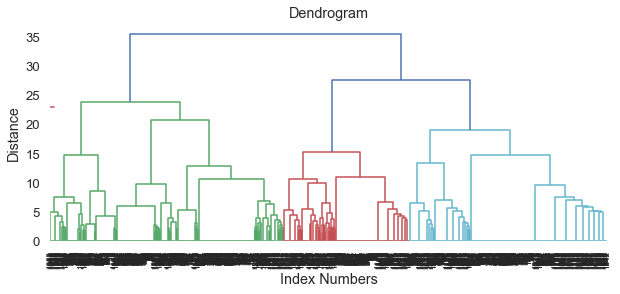

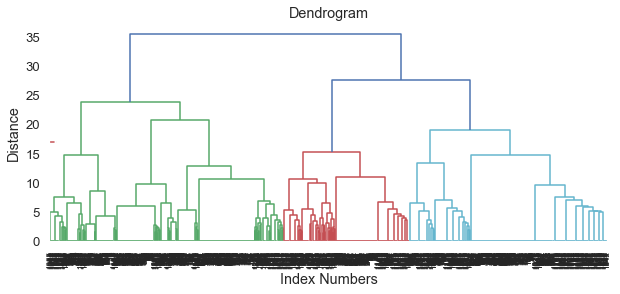

In [30]:
Z = linkage(X, 'ward')
plot_dist_thresh(30)
plot_dist_thresh(23)
plot_dist_thresh(17)

In [31]:
cluster_kmean = KMeans(n_clusters=6, random_state=0).fit(X)

predicted = cluster_kmean.labels_
centroids = cluster_kmean.cluster_centers_

print(("Predicted clusters to points: ", predicted))
print("Location of centroids: ")
print(centroids)

('Predicted clusters to points: ', array([1, 3, 3, ..., 0, 5, 0]))
Location of centroids: 
[[ 2.01342282e-02  4.69798658e-02  3.35570470e-02  2.01342282e-02
   3.08724832e-01  2.01342282e-02  9.39597315e-02  3.08724832e-01
   2.01342282e-02  1.27516779e-01  1.27516779e-01  3.75838926e-01
   4.96644295e-01 -1.88737914e-15  9.53020134e-01  6.71140940e-03
   6.71140940e-03  4.71844785e-16  3.35570470e-02  3.35570470e-02
   9.66442953e-01]
 [ 9.64360587e-02  1.21593291e-01  4.40251572e-02  5.66037736e-02
   4.71698113e-01  2.93501048e-02  3.56394130e-02  7.33752621e-02
   4.40251572e-02  2.72536688e-02  1.63522013e-01  2.22044605e-15
   8.36477987e-01  9.72746331e-01  5.96744876e-16  1.25786164e-02
   8.45677695e-18 -3.33066907e-16  1.46750524e-02  2.49800181e-15
   1.00000000e+00]
 [ 1.17647059e-01  9.19117647e-02  2.94117647e-02  3.30882353e-02
   5.40441176e-01  3.67647059e-03  4.04411765e-02  5.14705882e-02
   4.41176471e-02  4.77941176e-02 -4.44089210e-16  1.00000000e+00
   5.55111512

## Ensemble methods & Decision Tree Models

In [32]:
## DecisionTree
dt = DecisionTreeClassifier()
print("Decision Tree:")
print("-------------------------")
print("Cross Validation Score: ", cross_val_score(dt, X_train, y_train, cv=5).mean())
dt.fit(X_train, y_train)
print("DecisionTree [TRAIN] Score: ", dt.score(X_train, y_train))
print("DecisionTree [TEST] Score: ", dt.score(X_test, y_test))
print("===============================")

Decision Tree:
-------------------------


C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [33]:
## BaggingClassifier
bag = BaggingClassifier(n_estimators=10000)
print("Decision Tree:")
print("-------------------------")
print("Cross Validation Score: ", cross_val_score(bag, X_train, y_train, cv=5).mean())
bag.fit(X_train, y_train)
print("BaggingClassifier [TRAIN] Score: ", bag.score(X_train, y_train))
print("BaggingClassifier [TEST] Score: ", bag.score(X_test, y_test))
print("===============================")

Decision Tree:
-------------------------


C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [34]:
## RandomforestClassication
rfc = RandomForestClassifier(n_estimators=10000)
print("Random-Forest Classifier:")
print("-------------------------")
print("Cross Validation Score: ", cross_val_score(rfc, X_train, y_train, cv=5).mean())
rfc.fit(X_train, y_train)
print("RandomForestClassifier [TRAIN] Score: ", rfc.score(X_train, y_train))
print("RandomForestClassifier [TEST] Score: ", rfc.score(X_test, y_test))
print("===============================")

Random-Forest Classifier:
-------------------------


C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [35]:
## ExtraTrees Classification
et = ExtraTreesClassifier(n_estimators=10000)
print("Extra-Trees Classifier:")
print("-------------------------")
print("Cross Validation Score: ", cross_val_score(et, X_train, y_train, cv=5).mean())
et.fit(X_train, y_train)
print("ExtraTrees Classifier [TRAIN] Score: ", et.score(X_train, y_train))
print("ExtraTrees Classifier [TEST] Score: ", et.score(X_test, y_test))
print("===============================")

Extra-Trees Classifier:
-------------------------


C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

## SVM

In [36]:
def plot_svm(clf):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))

    # create grid to evaluate model
    xy = np.vstack([xx2.ravel(), yy2.ravel()]).T
    Z = clf.decision_function(xy).reshape(xx2.shape)

    # plot decision boundary and margins
    ax.contourf(xx2, yy2, Z, cmap=plt.cm.binary, alpha=0.2)
    ax.contour(xx2, yy2, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if not isinstance(clf, LinearSVC):
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150,
               linewidth=1, facecolors='none', edgecolors='k')
        print (clf.support_vectors_)
        
    plt.show()
    

In [ ]:
fsd=

In [37]:
sv = SVC(kernel='poly', degree=3, C=1000)
sv.fit(X_train, y_train)
plot_svm(sv)

y_pred = sv.predict(X_test)
cross_val_score(sv,X_train, y_train,cv=5, scoring='accuracy').mean()

ValueError: Unknown label type: 'continuous'

In [38]:
clf = SVC()

gamma_range = np.logspace(-5, 2, 10)
C_range = np.logspace(-3, 2, 10)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X,y)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [39]:
# check the results of the grid search
print(grid.best_params_)
print(grid.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [40]:
best_svm = grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [41]:
# Start with logistic Regression
logistic = LogisticRegression()
print(cross_val_score(logistic, X_train, y_train, cv=5, scoring='accuracy').mean())


# Let's try a SVM
clf = SVC()
print(cross_val_score(clf, X_train,y_train, cv=5, scoring='accuracy').mean())

C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shaynie\Anaconda3\envs\capstone_app\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'